# Assignment 3: LDA Topic Modeling

## Note
Installing Tomotopy locally can return an error, if that's the case run this notebook on Google Colab

## Research Background

LDA is a popular topic modeling algorithm widely used in the fields of Digital Humanities and Social Sciences. In the field of political communication, topic modeling is often applied for analyzing politicians Twitter/X posts, identitying thematic patterns or topics revolving around their posts.

For this assignment, students will work with tweets from two USA politicians, Donald Trump and Bernie Sanders, who are often regarded as right-wing populist and left-wing populist respectively. Right-wing populism often emphasizes nationalism, anti-immigration policies, and a critique of global elites from a culturally conservative perspective, focusing on preserving traditional values and social hierarchies. Left-wing populism prioritizes economic inequality, advocating for the redistribution of wealth, expansion of social services, and empowerment of the working class against the capitalist elite. While both forms of populism appeal to the "common people" against perceived elites and established structures, they diverge significantly in their identification of the elites, proposed solutions, and core ideologies. For a more detailed explanation, you can read the chapter by Macaulay (2019) "Bernie and The Donald: A comparison of left-and right-wing populist discourse" (full reference below).

**Research Questions**
1. What topics are revolving around Donald Trump and Bernie Sanders' posts separately?
2. What are the topic differences between Trump (right-wing popoulist) and Sanders (left-wing populist)?

**Aim:**
1. The first aim of the assignment is to conduct LDA topic modeling. Identify thematic patterns or politics revolving around Trump or Sanders's posts.
2. The second aim is to critically evaluate the results of topic modeling. Try different numbers of topics to see with which settings the topics are more coherent. Critically reflect on the results of LDA topic modeling, discussing them in relation to existing theories about populism.

**Data**
Two datasets are prepared for this assginment. Tweets from Trump and tweets from Sanders. Students are asked to work on these two datasets.

**Methods**
1. Word segamentation
2. Removing stopwords
3. LDA topic modeling
4. Topic evaulation (coherence and human evaluation)
5. Visualization of results.

**References**
1. Macaulay, M. (2019). Bernie and the Donald: A comparison of Left-and Right-wing populist discourse. *Populist discourse: International perspectives*, 165-195.





## Setup

### Q1. Install necessary libraries, including `tomotopy` and `little_mallet_wrapper`, and import them

In [ ]:
# Q1 (code)
!pip install tomotopy #install tomotopy
!pip install little_mallet_wrapper #install little_mallet_wrapper

import tomotopy as tp #import tomotopy
import little_mallet_wrapper #import little_mallet_wrapped
import seaborn #import seaborn
import glob #import glob
from pathlib import Path #import path
import pandas as pd #import pandas
import re #import re

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.2/17.2 MB 34.2 MB/s eta 0:00:00


## Data preprocessing

### Q2. Load the two datasets and concatenate them

The goal is to run topic modelling on the combined dataset of Sanders and Trump's tweets

In [ ]:
# Q2 (code)
#load the two datasets
sanders_tweets = pd.read_csv('sanders_tweets.csv')
trump_tweets = pd.read_csv('trump_tweets.csv')

# combine the two datasets
tweets = pd.concat([sanders_tweets, trump_tweets], ignore_index=True)

#display sample rows
tweets.head()

,Username,TweetId,Title,Content
0,SenSanders,1351670845639421952,SenSanders_1351670845639421952,Wealth increase in past 10 months:\n⬆️$173 bil...
1,SenSanders,1351259762722279424,SenSanders_1351259762722279424,Amidst massive income and wealth inequality te...
2,SenSanders,1351242822293319680,SenSanders_1351242822293319680,"“We now have the resources, we now have the sk..."
3,SenSanders,1350885541911400448,SenSanders_1350885541911400448,"After surviving an attempt on his life, Russia..."
4,SenSanders,1349880150041780224,SenSanders_1349880150041780224,President-Elect Biden's COVID rescue plan will...


### Q3. Clean the data

Transform all tweets to lowercase, remove stopwords, punctuation, and numbers. Add the processed text to a list called `training_data`.
Create a list with the content of the tweets (`original_texts`) and a list that allows you to identify both the author of the tweet and its ID (`titles`).


In [ ]:
# Q3 (code)

training_data = [] #create an empty list training_data
original_texts = [] #create an empty list original_texts
titles = [] #create an empty list titles

# part of the loop code is from chatgpt, part is from the previous course materials
# loop the code in every row
for index, row in tweets.iterrows():
    text = str(row['Content'])
    # transform tweets to lowercase, remove stopwords, punctuation and numbers
    processed_text = little_mallet_wrapper.process_string(text, numbers='remove')
    # As the urls impact the result a lot, need to remove URLs, user mentions, and specific unwanted patterns
    # this code is from chatgpt
    processed_text = re.sub(r"http\S+|www\S+|https\S+|\/\/t|co\/|\@\w+|realdonaldtrump", '', processed_text, flags=re.MULTILINE)
    # add the processed text to the list training_data
    training_data.append(processed_text)
    # add the text to the original text list
    original_texts.append(text)
     # add the author and the ID to the list titles
    titles.append(row['Title'])


#print the length of data to check
len(training_data), len(original_texts), len(titles)

(30371, 30371, 30371)

## LDA topic modelling

### Q4. Train a an LDA topic model with `tomotopy`

In [ ]:
# Q4 (code)

# Number of topics to return
num_topics = 15
# Numer of topic words to print out
num_topic_words = 10

# Intialize the model
model = tp.LDAModel(k=num_topics)

# Add each document to the model, after splitting it up into words
for text in training_data:
    model.add_doc(text.strip().split())
# print title of the task
print("Topic Model Training...\n\n")
# Iterate over the data 10 times
iterations = 10
for i in range(0, 100, iterations):
    model.train(iterations)
    print(f'Iteration: {i}\tLog-likelihood: {model.ll_per_word}')


Topic Model Training...


Iteration: 0	Log-likelihood: -9.72890207706088
Iteration: 10	Log-likelihood: -9.308035631471475
Iteration: 20	Log-likelihood: -9.131363669346285
Iteration: 30	Log-likelihood: -9.042475907162324
Iteration: 40	Log-likelihood: -8.985499285394008
Iteration: 50	Log-likelihood: -8.947337198247263
Iteration: 60	Log-likelihood: -8.921340200752939
Iteration: 70	Log-likelihood: -8.896945065102456
Iteration: 80	Log-likelihood: -8.880480265675738
Iteration: 90	Log-likelihood: -8.866769133292491


### Q5. Print out the top words for each topic and manually evaluate their coherence


In [ ]:
# Q5a (code)
# Print out top 10 words for each topic

# print title
print("\nTopic Model Results:\n\n")

# create a list of the topics
topics = []
# create a list of words every topic
topic_individual_words = []
# loop in topics to add words in to word list
for topic_number in range(0, num_topics):
    topic_words = ' '.join(word for word, prob in model.get_topic_words(topic_id=topic_number, top_n=num_topic_words))
    topics.append(topic_words)
    topic_individual_words.append(topic_words.split())
# print every topic and its words
    print(f"✨Topic {topic_number}✨\n\n{topic_words}\n")


Topic Model Results:


✨Topic 0✨

workers wage people family america every year country living world

✨Topic 1✨

change climate energy must fossil planet covid crisis system fuel

✨Topic 2✨

health care tax people trump million security medicare right americans

✨Topic 3✨

biden democrats joe president would nothing want never left even

✨Topic 4✨

jobs economy trump president record new time since back market

✨Topic 5✨

great border vote total strong endorsement military crime complete republican

✨Topic 6✨

people must united states country american law women stand world

✨Topic 7✨

senate house vote election court democrats impeachment republicans supreme president

✨Topic 8✨

great thank house state white see congratulations forward today maga

✨Topic 9✨

must people congress need drug wall end war americans street

✨Topic 10✨

china states trade united many country much great deal countries

✨Topic 11✨

president whitehouse thank live today great day honor national god

✨Topic 1

Q5b (words)

**this is the result of my first training. I run the code afterwards again so the the result in this cell can be different from the result shown in the last cell**

Describe what each topic is about. What ideas, values, or situations do these keywords refer to?

Topic Model Results:


✨Topic 0✨

united states trump people president must court vote democracy right

This topic is about the USA political issues, as democracy and the right are mentioned. The president and the vote refer to the vote of the government. Court refers to the law issues. Must may suggest the tough policy.

✨Topic 1✨

change climate energy fossil jobs planet unemployment trump system new

This topic refers to the evironment issues as energy, fossile and climate change are mentioned. The jobs and unemployment may show the negative impact caused by environment issues.

✨Topic 2✨

war wall street trump end saudi yemen senate big today

This topic is about the Trump's attitude or policies towards the yemen war. This suggests the concern on the international human right issues from USA.

✨Topic 3✨

health care people right medicare republicans americans security social must

This topic suggests social healthy and medicare system in USA. Must shows there maybe a strong emotion or attitude within the topic.

✨Topic 4✨

trade many china jobs states great united back years big

This topic is about the international trade state between China and USA. Many, big, great refers to a positive attitude. Jobs shows it refers to the job opportunities brought from the trade state.


✨Topic 5✨

trump collusion fbi russia campaign mueller hunt witch hillary clinton

This topic is about the investigation into alleged collusion between Donald Trump's 2016 presidential campaign and Russia, which was primarily conducted by Special Counsel Robert Mueller.


✨Topic 6✨

people must drug country americans need american america congress world

This topic is about the american people and their drug issues. Congress shows the government is concerned about the issue. Need shows the issue is expected to be solved.

✨Topic 7✨

puerto rico must trump people would national american stand access

This topic is about the Hurricane Maria in Puerto Rico and President Trump's attitude on it. Must suggests a tough situation it caused and trouble to be solved. National shows it is a heavy disaster.


✨Topic 8✨

news fake media people never great even good time much

The topic refers to the fake news on media. Much and never shows its a significat phenomena. Good or great shows positive attitude on it, which deserves to be investigated.

✨Topic 9✨

trump president sanders live since administration first watch join record

This topic is about Trump and Sander. It is about the live and record of them.

✨Topic 10✨

great thank state vote job military big first strong florida bo

This is about the Florida, refering to some political issues, like vote or military. Big, strong,great show the strength of the events or issue. Thank suggests a positive emotional value.

✨Topic 11✨

day women today country america justice people stand american every

This topic is about the current femenist justice in USA. day , today, every day shows this is related closely to the current american's life.

✨Topic 12✨

tax workers billion pay wage million year class corporations working

This is about the worker class and their tax issues. It is related to the ecomonic situations. Billion and million shows this is a significant issue.

✨Topic 13✨

border democrats wall country security want immigration republicans must get

THis is about the immigration issues in the USA. Wall of the countries and security suggests the boarderline of the countries is probably to be blocked. Must may suggest a tough policy.

✨Topic 14✨

great today whitehouse president thank honor forward house free white

This refers to the president and the whitehouse. Great, honor, thank show the positive emotional value. So it may be about the celebration of the president iauguration。

## Topic coherence

Use `tomotopy`'s [`.coherence()`](https://bab2min.github.io/tomotopy/v0.10.0/en/coherence.html) function to automatically calculate the topic coherence.

The coherence value can vary from `0` (no coherence) to `1` (maximum coherence). Interpret the results and, if needed, retrain the model using a different number of topics.

In [ ]:
# There are different metrics for coherence, we choose `c_v`

coh = tp.coherence.Coherence(model, coherence='c_v')
average_coherence = coh.get_score()
coherence_per_topic = [coh.get_score(topic_id=k) for k in range(model.k)]

# print results
print('==== Coherence : {} ===='.format('c_v'))
print('Average:', average_coherence, '\nPer Topic:', coherence_per_topic)
print()

==== Coherence : c_v ====
Average: 0.5631169542918603 
Per Topic: [0.49730970412492753, 0.5831834733486175, 0.46214466691017153, 0.7935780733823776, 0.5130392223596573, 0.6014256849884987, 0.5483158349990844, 0.5410687625408173, 0.6319708019495011, 0.5060192454606295, 0.5724764615297318, 0.6707983493804932, 0.4627307623624802, 0.5638584405183792, 0.49883483052253724]



### Q6. Interpret topic coherence

Report the following:
- number of topics you initially used to train the model and the coherence score you got
- changes made to the number of topics and new coherence scores obtained

### Q6 (words)
#### initially:

**this is the result of my first training. I run the code afterwards again so the the result in this cell can be different from the result shown in the last cell**


Number of topics to return

num_topics = 15

Numer of topic words to print out

num_topic_words = 10

==== Coherence : c_v ====

Average: 0.5655719671895106

Per Topic: [0.44475172758102416, 0.6040919605642557, 0.48915781900286676, 0.6458914428949356, 0.5444373100996017, 0.7964076101779938, 0.5484897345304489, 0.4677458554506302, 0.5472859136760235, 0.43834923058748243, 0.6058647900819778, 0.5111197978258133, 0.7089637160301209, 0.5574364185333252, 0.57358618080616]


The average coherence score is 0.5655719671895106. This score is moderate. The model can capture the content well. But it still could be advanced.
Topic 6 scored 0.7964076101779938, indicating a high degree of coherence. This score shows that the words within this topic are closely related, making it a strongly coherent topic.
Topic 9 score is 0.43834923058748243, this is a weaker relatedness among the topic's words. The topic is less coherent, possibly covering more diverse or unrelated concepts.

#### changes:


15 : 0.5655719671895106

20 : 0.5921958226989955

30 : 0.6053002022330959

40 : 0.6285927747376265  

50 : 0.6316116304844619  

60 : 0.6263634580870471   

70 : 0.6590297823931492  

80 : 0.6927529632300138  

90 : 0.6640781739354136   

100: 0.6939850674569606  
  

### X1. Optional question 1
(This question is not compulsory, it only allows you to get an extra point.)

Create a function to plot the average coherence for models with different number of topics.

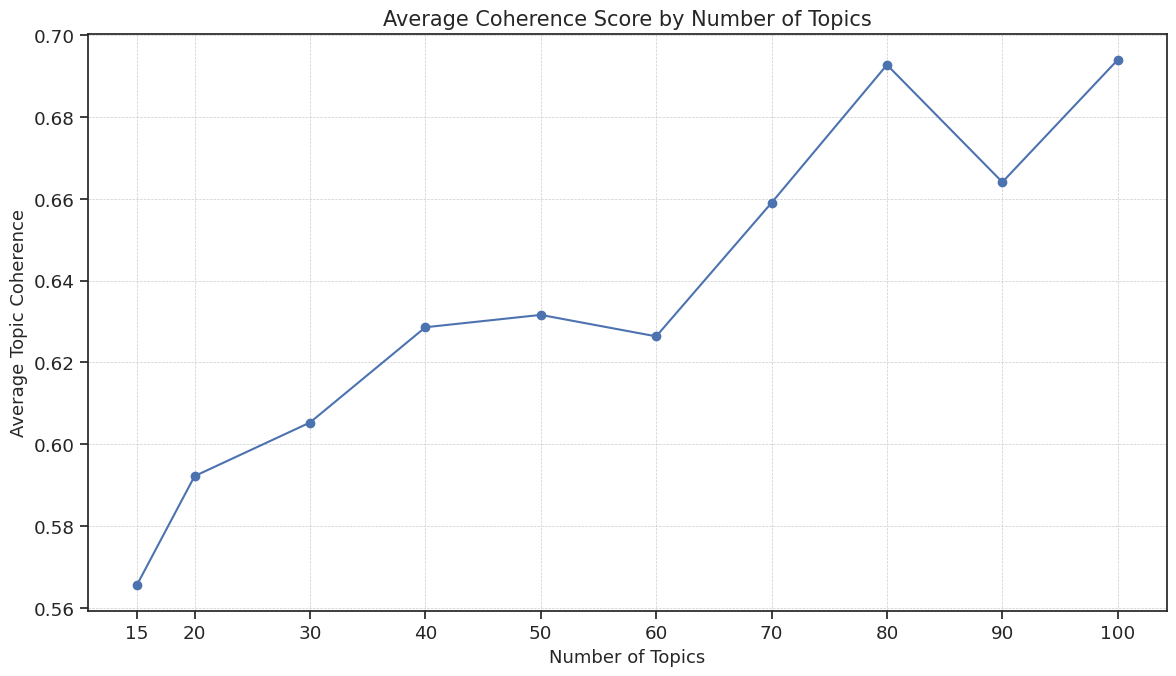

In [ ]:
# X1 (code)

# Tip: y = average topic coherence; x = number of topics in the model
# the code is helped by chatgpt
#import package to show plot
import matplotlib.pyplot as plt

#define the function to show polt. this code is helped by chatgpt
def plot_average_coherence(num_topics_list, average_coherence_scores):
    # Set the figure size for better readability
    plt.figure(figsize=(12, 7))
    # Plot the data
    plt.plot(num_topics_list, average_coherence_scores, marker='o', linestyle='-', color='b')
    # Title of the plot
    plt.title('Average Coherence Score by Number of Topics', fontsize=15)
    # Label for the x-axis
    plt.xlabel('Number of Topics', fontsize=13)
    # Label for the y-axis
    plt.ylabel('Average Topic Coherence', fontsize=13)
    # Ensure each number of topics is marked on the x-axis for clarity
    plt.xticks(num_topics_list)
    # Add grid for better readability
    plt.grid(True, which='both', linestyle='--', linewidth=0.5)
    # Adjust the layout to make sure everything fits without overlapping
    plt.tight_layout()
    # Display the plot
    plt.show()

# Updated example usage with numbers from the table
num_topics_list = [15, 20, 30, 40, 50, 60, 70, 80, 90, 100]
average_coherence_scores = [
    0.5655719671895106, 0.5921958226989955, 0.6053002022330959, 0.6285927747376265,
    0.6316116304844619, 0.6263634580870471, 0.6590297823931492, 0.6927529632300138,
    0.6640781739354136, 0.6939850674569606
]

#display the plot
plot_average_coherence(num_topics_list, average_coherence_scores)



Analysis: The average topic coherence increases while the number of topics increases in general. However, when the number of topics is 60 and 90, it shows a slight drop and then increases again afterward.

### Q7. Topic distributions
Calculate the topic distributions for all tweets and get the top documents for some topics (between 2 and 5) that you think could be more representative of Sanders or Trump.

In [ ]:
# Q7a (code)

# get the topic distrbutionlist
topic_distributions = [list(doc.get_topic_dist()) for doc in model.docs]

#import packages to display the documents
from IPython.display import Markdown, display
# import the regular expressions library re, which will allow us to find and replace the correct words
import re

# define a function to display a string as Markdown
def make_md(string):
    display(Markdown(str(string)))

# Define a function to get the top documents for a given topic
def get_top_docs(docs, topic_distributions, topic_index, n=5):
    # Sort the documents by the probability of the specified topic in descending order
    sorted_data = sorted([(_distribution[topic_index], _document)
                          for _distribution, _document
                          in zip(topic_distributions, docs)], reverse=True)
    # Get the words associated with the specified topic
    topic_words = topics[topic_index]
    # Display the topic header and its words
    make_md(f"### ✨Topic {topic_index}✨\n\n{topic_words}\n\n")
    print("---")
    # Loop through the top n documents
    for probability, doc in sorted_data[:n]:
        # Make topic words bolded
        for word in topic_words.split():
            if word in doc.lower():
                doc = re.sub(f"\\b{word}\\b", f"**{word}**", doc, re.IGNORECASE)
        # Use regular expression to replace the word with its bolded version
        make_md(f'✨  \n**Topic Probability**: {probability}  \n**Document**: {doc}\n\n')

    return



# Display 5 documents for topics
get_top_docs(original_texts, topic_distributions, topic_index=6, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=8, n=5)
get_top_docs(original_texts, topic_distributions, topic_index=12, n=5)

### ✨Topic 6✨

people must united states country american law women stand world



---


✨  
**Topic Probability**: 0.882722020149231  
**Document**: Congress **must** eliminate tax code loopholes that allow the wealthy to avoid billions in taxes each year through offshore tax shelters.



✨  
**Topic Probability**: 0.8745434284210205  
**Document**:  “MUELLER’S PARTISAN WITCH HUNT!” https://t.co/XTD5f5ZOz2



✨  
**Topic Probability**: 0.874280571937561  
**Document**:  RT @JudicialWatch: Judicial Watch announced it received 756 pages of newly uncovered emails that were among the materials former Secretary of State Hillary Clinton tried to delete or destroy, several of which were classified.   https://t.co/INxKemnrax



✨  
**Topic Probability**: 0.8645297288894653  
**Document**: Will the Republicans in Congress listen to the American **people**, or simply obey the dictates of the NRA?
https://t.co/0VKWRVJWrA



✨  
**Topic Probability**: 0.8645297288894653  
**Document**: Let us celebrate #InternationalWomensDay with a pledge to defend **women**'s rights.



### ✨Topic 8✨

great thank house state white see congratulations forward today maga



---


✨  
**Topic Probability**: 0.9510560631752014  
**Document**: Half of our seniors survive on $25,000 a year or less.

Outrageously, Trump tried to make them jump through hoops during a pandemic to get their $1,200 emergency relief payment.

Thanks to strong pressure, Trump reversed this policy. Seniors will get the help they need right now.



✨  
**Topic Probability**: 0.9116906523704529  
**Document**:  What Mini Mike is doing is nothing less than a large scale illegal campaign contribution. He is “spreading” money all over the place, only to have recipients of his cash payments, many former opponents, happily joining or supporting his campaign. Isn’t that called a payoff? .....



✨  
**Topic Probability**: 0.9058296084403992  
**Document**: What does it mean when the function of the health care system—in the richest country in the history of the world—is to make billions for insurance and drug companies? 

18 percent of Americans with diabetes are rationing the medications they need to live. https://t.co/zyDjSiA3FP



✨  
**Topic Probability**: 0.9018198847770691  
**Document**:  A large number of counts, ten, could not even be decided in the Paul Manafort case. Witch Hunt!



✨  
**Topic Probability**: 0.8960080742835999  
**Document**:  96% Approval Rating in the Republican Party. Thank you! Also, leading in most swing states!



### ✨Topic 12✨

trump fbi collusion witch russia hunt mueller hillary campaign clinton



---


✨  
**Topic Probability**: 0.9457778930664062  
**Document**:  RT @paulsperry_: BREAKING: Even Mueller's case against Russia itself, for interfering in the 2016 election, is breaking down



✨  
**Topic Probability**: 0.9382714033126831  
**Document**:  ....The United States looses soooo much money on Trade with Mexico under NAFTA, over 75 Billion Dollars a year (not including Drug Money which would be many times that amount), that I would consider closing the Southern Border a “profit making operation.” We build a Wall or.....



✨  
**Topic Probability**: 0.9202268719673157  
**Document**:  Trump on Russia Hoax: ‚ÄòWhen the Papers Come Out‚Äô We Will Learn Obama ‚ÄòKnew Everything‚Äôhttps://thegreggjarrett.com/**trump**-on-**russia**-hoax-when-the-papers-come-out-we-will-learn-obama-knew-everything/ ‚Ä¶



✨  
**Topic Probability**: 0.9153764247894287  
**Document**:  RT @PressSec: The Trump effect: “The U.S. economy is running at its full potential for the first time in a decade” -WSJ https://t.co/ee5N0zOU7W



✨  
**Topic Probability**: 0.9055988788604736  
**Document**:  Nothing funny about tired Saturday Night Live on Fake News NBC! Question is, how do the Networks get away with these total Republican hit jobs without retribution? Likewise for many other shows? Very unfair and should be looked into. This is the real Collusion!



Interpret the results above. Are there topics that have top tweets only by one politician? Why do you think these topics are more representative of one of the two politicians' views?

# Q7b (words)


Are there topics that have top tweets only by one politician?   

yes，topic 12 is more like the tweets only by Trump. They are questioning and opposing Mueller's investigation, criticizing NAFTA and supporting closing the southern border and building a wall, claiming that the Russian interference investigation is a hoax and blaming Obama, praising the economic achievements under the Trump administration, and criticizing the mainstream media for unfair coverage of the Republican Party. These tweets reflect the main views of Republican supporters.

Why do you think these topics are more representative of one of the two politicians' views?  

Topic 12 is more representative of Republican viewpoints, as it includes discussions about Trump, Russia, collusion, and criticisms of the media.

However, both Topics 6 and 8 contain tweets with both Democratic and Republican views. So they more are representative of the two politician's views.
Tweets in Topic 6 include criticisms of tax loopholes and the National Rifle Association, which are consistent with Democratic views. There are also criticisms of the Mueller investigation and Hillary Clinton, which are Republican views.
Tweets in Topic 8 have criticisms of Trump's actions during the pandemic and health care system problems, which are Democratic views. However, support for the Trump administration and approval Rating in the Republican Party are consistent with Republican views.

## Large scale analysis

### Q8. Create a random sample of the whole dataset and visualize the topic distributions for the sampled tweets

In [ ]:
# Create a sample of tweets
# import module
from random import sample
# create sample
target_labels = sample(titles,100)

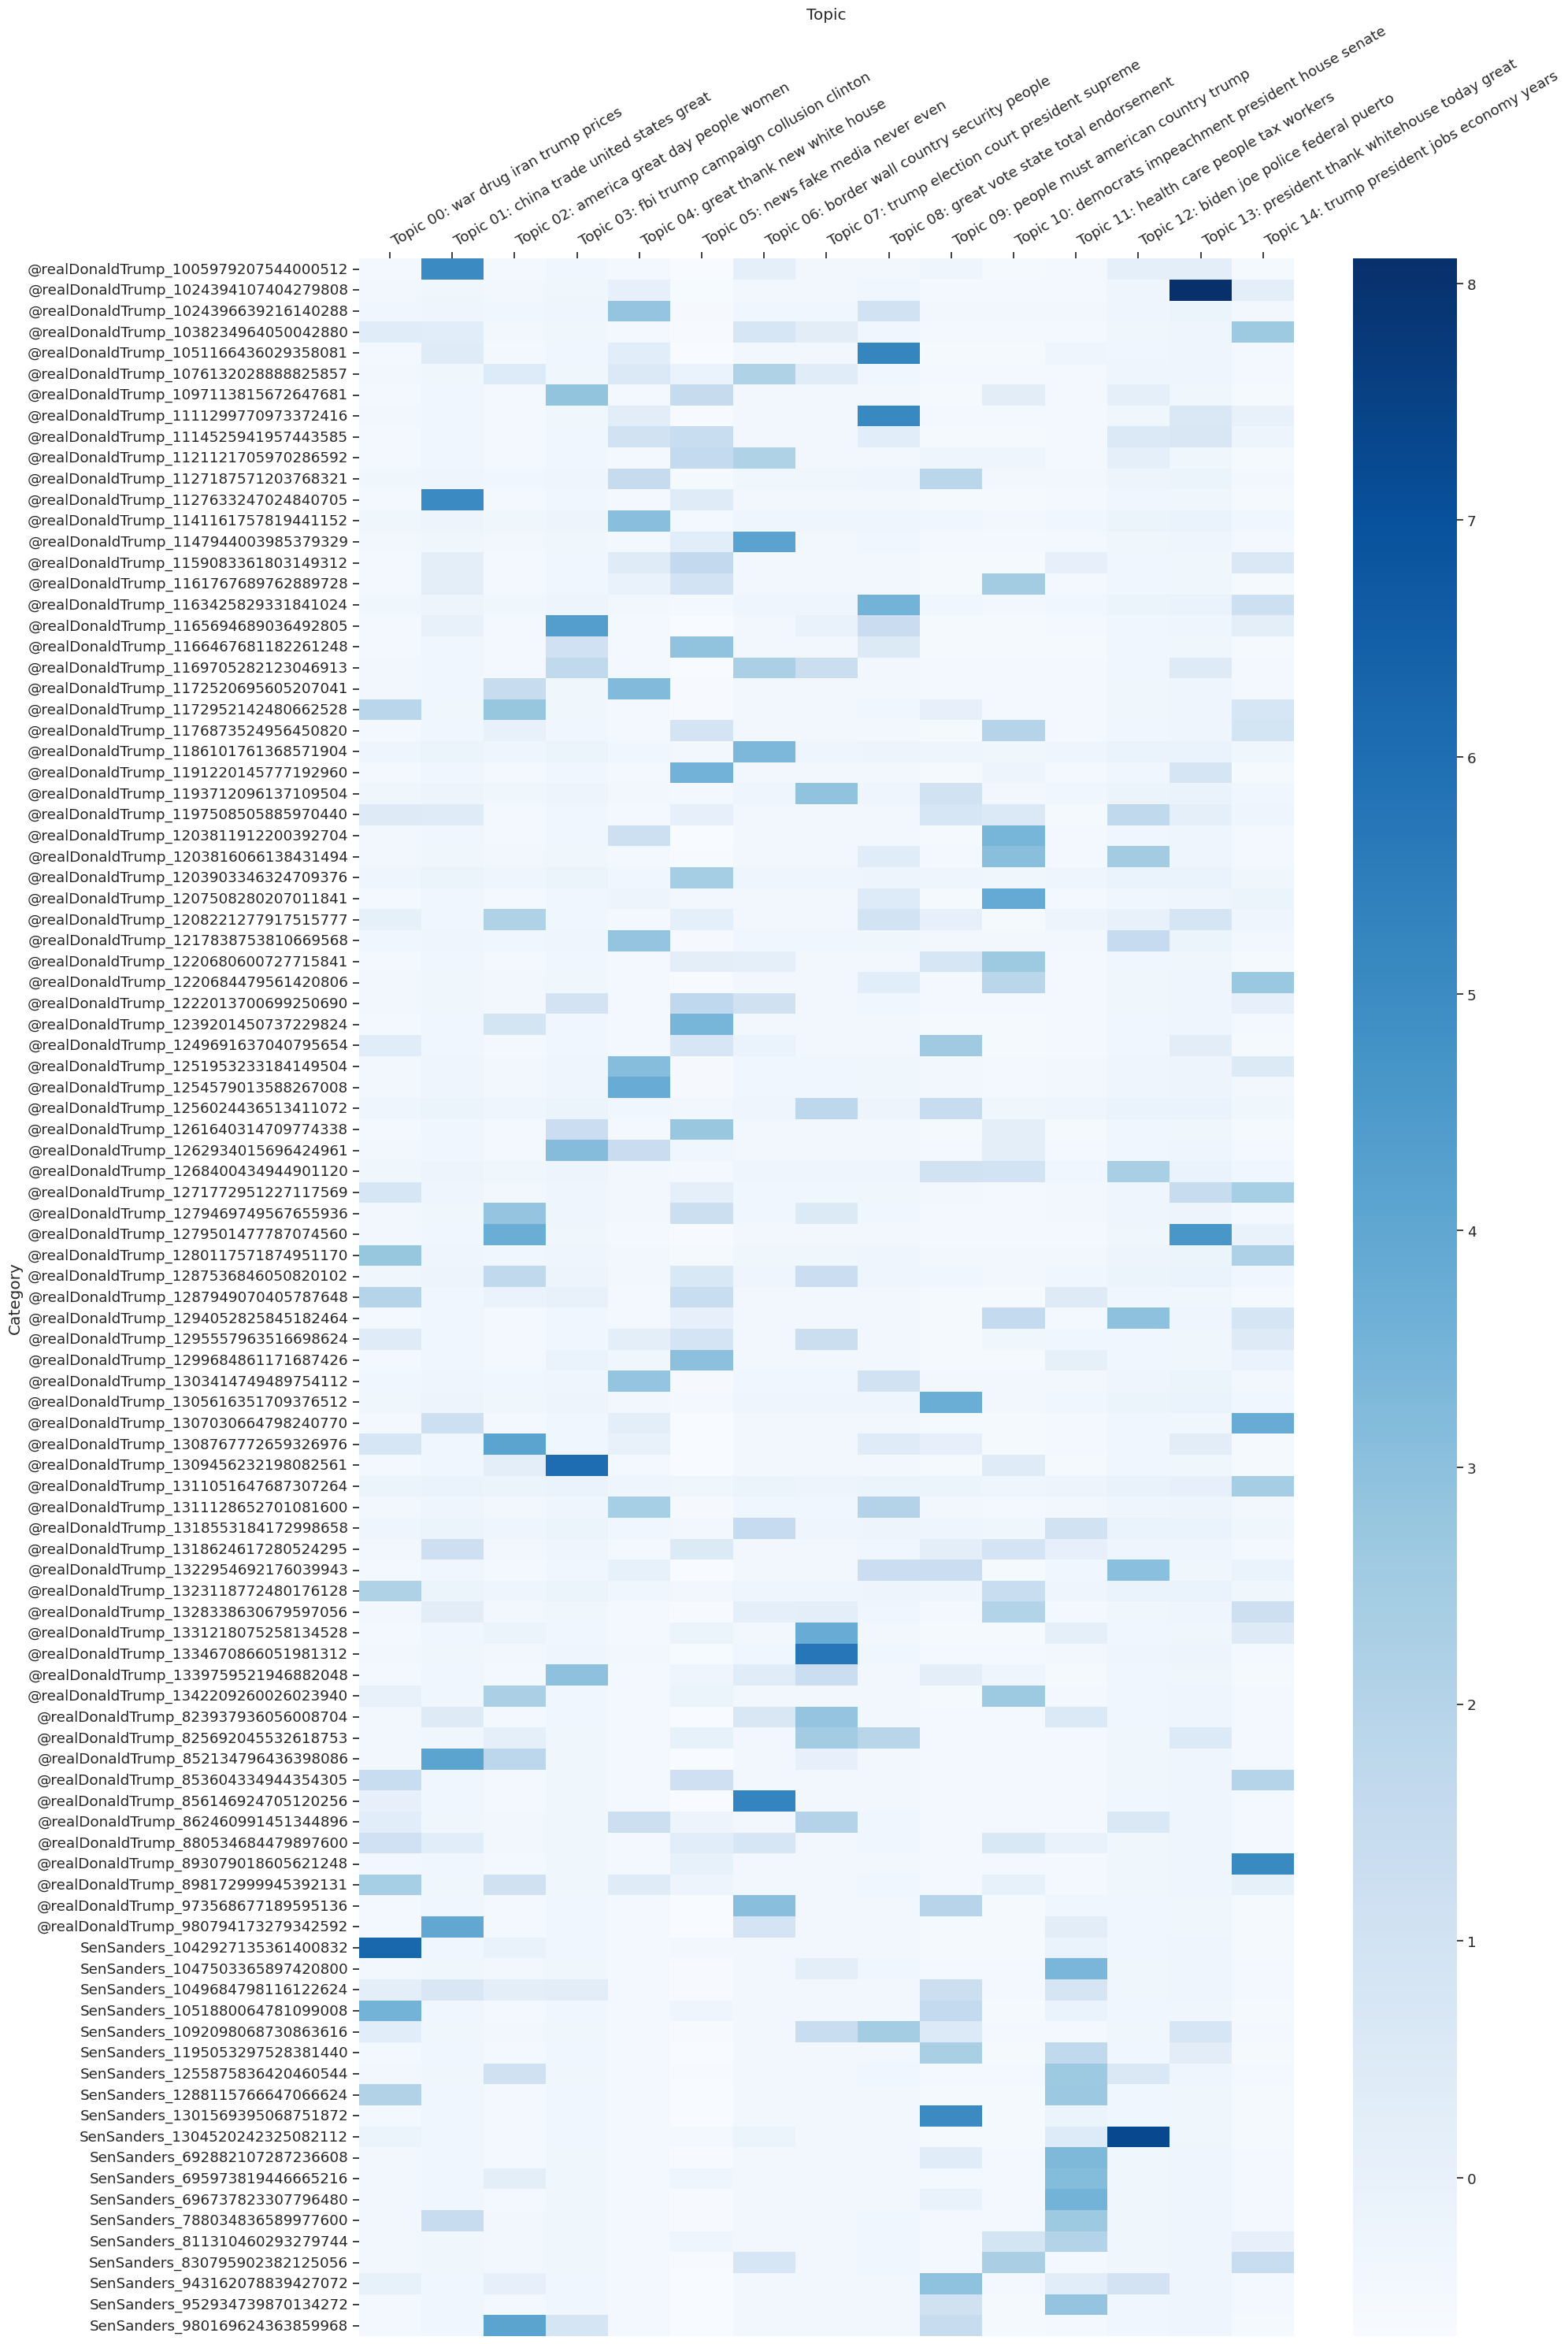

In [ ]:
# Q8 (code)
# Create a heatmap using the random sample
# Tip: to display more than 20 tweets you have to change the values of `dim =` in sns.heatmap()

# import modules for display plot
import matplotlib.pyplot as plt
import seaborn as sns
# define funtion to create heatmap
# set the seaborn style and font scale for the heatmap
sns.set(style='ticks', font_scale=1.2)
# set parametors for heatmap
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
    for _label, _distribution in zip(labels, topic_distributions):
      # check if the label is in target labels or if target labels are not specified
        if not target_labels or _label in target_labels:
           # enumerate through topic distributions
            for _topic_index, _probability in enumerate(_distribution):
              # Append the Probability Category topics to the list
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    # Create a dataframe from the list of dictionaries
    df_to_plot = pd.DataFrame(dicts_to_plot)
    # Pivot the dataframe to create a wide format
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
    # normalize the columns
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # Show the final plot and set the parameters of the plot
    # Set the figure size if dimensions are provided
    if dim:
        plt.figure(figsize=dim)
    # Set seaborn style and font scale
    sns.set(style='ticks', font_scale=1.2)
    # Create the heatmap with the specified color map
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    # Move the x-axis labels to the top
    ax.xaxis.tick_top()
    # Set the label position to the top
    ax.xaxis.set_label_position('top')
    # Rotate the x-axis labels
    plt.xticks(rotation=30, ha='left')
    # Adjust the layout to fit everything
    plt.tight_layout()
    # Show the plot
    plt.show()

# display the plot with color
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(20,30))

### Q9. Interpret the heatmap
Do you see any pattern in the probability distributions of topics for each politician?

Are there topics that are more likely for one of the two politicians?

# Q9 (words)



The darker squares in this heatmap represent a high probability for the corresponding topic, and the lighter squares in the heatmap represent a low probability for the corresponding topic.  

The topics that Trump mentions more frequently about political issues between countries. This relates to nationalist and sovereignty-first viewpoints common in right-wing politics. This could involve a hardline stance on foreign policy, a focus on national security, and confrontations with other countries, especially regarding trade and border security. Topics more likely about Trump are also the celebration of electoral victories. This reflects Trump's emphasis on electoral success during his presidency. It may also connect to nationalist sentiments and personal achievement celebrated during elections.


Topic 2 and 1 are more likely for Sanders. They are about public health care and environment issues. Support for universal healthcare access, funding public welfare programs through higher taxes, and other policies that expand the government's role in social safety nets are what left-wing concerns about.

### X2. Optional question 2
(This question is not compulsory, it only allows you to get an extra point)

Make the sample balanced, with 50 tweets by Trump and 50 by Sanders.

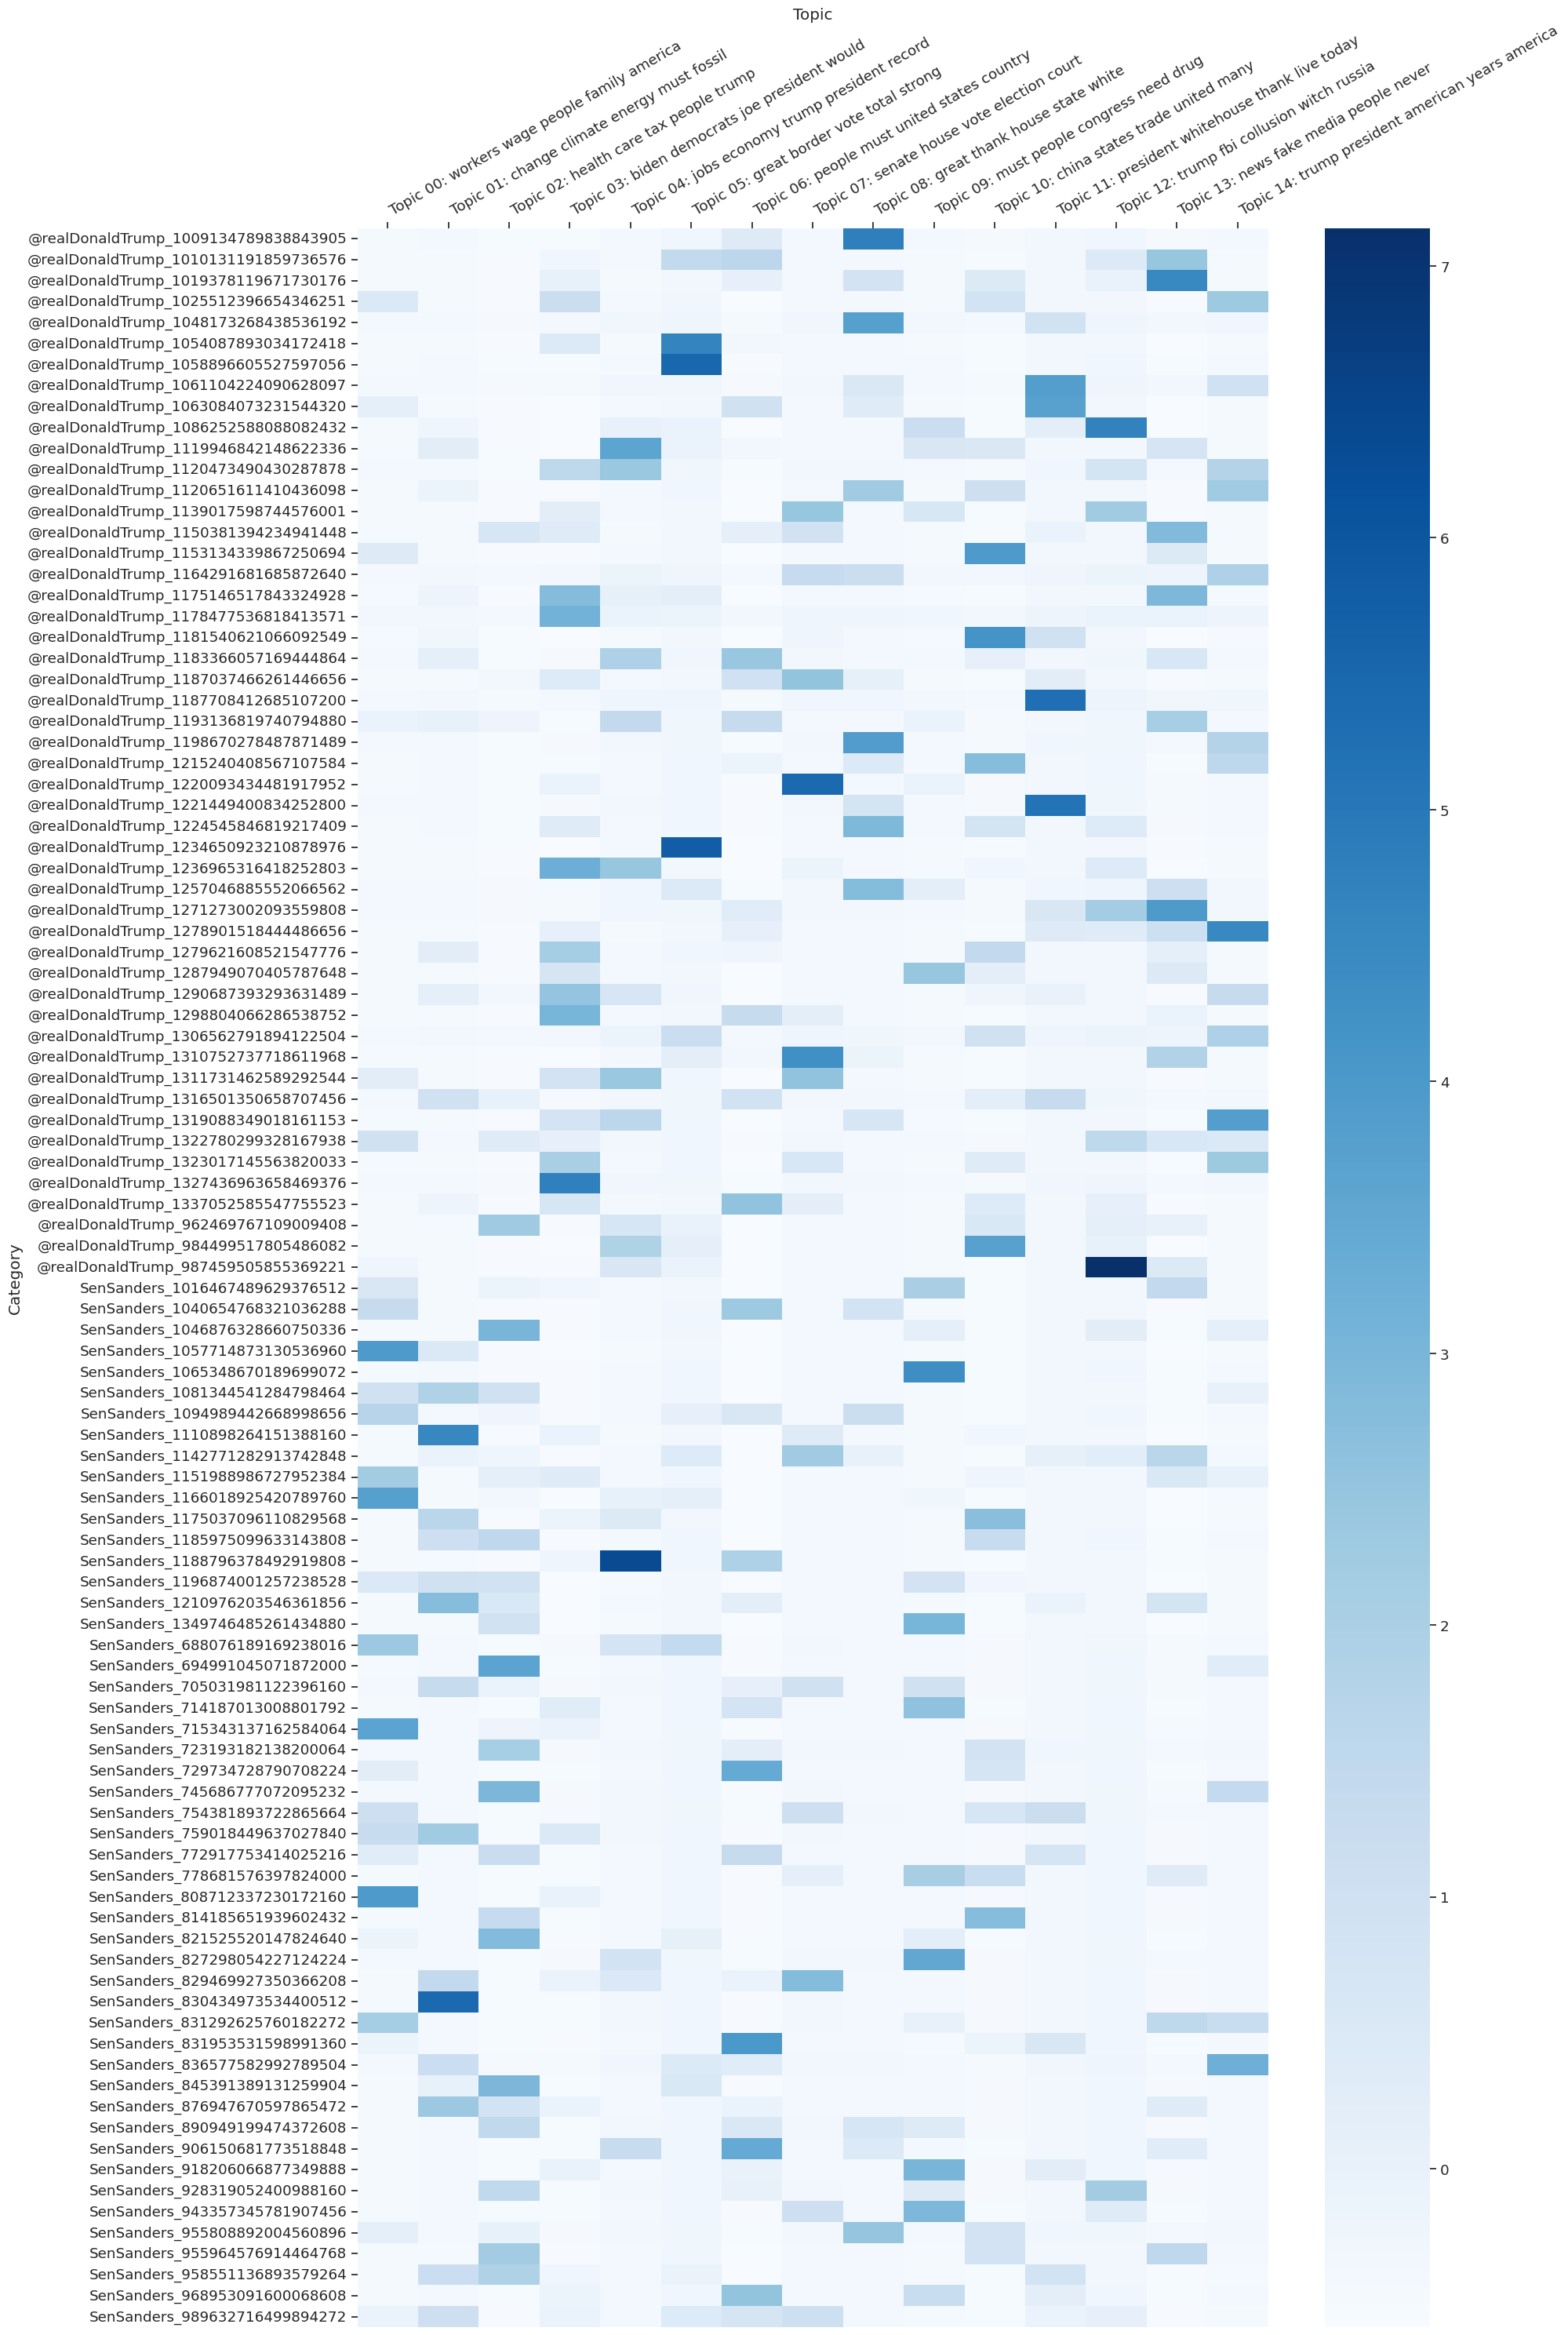

In [ ]:
# X2 (code)
# the code is helped by chatgpt
# Filter titles for each politician
trump_titles = [title for title in titles if 'Trump' in title]
sanders_titles = [title for title in titles if 'SenSanders' in title]

# Sample 50 titles for each politician
trump_sample = sample(trump_titles, 50)
sanders_sample = sample(sanders_titles, 50)

# Combine the two samples to create a balanced list of 100 titles
balanced_sample = trump_sample + sanders_sample

# Shuffle the combined list to randomize the order

target_labels = sample(balanced_sample, len(balanced_sample))

# Now random_balanced_sample contains a balanced, randomized sample of 100 tweets


# Set seaborn style and font scale
sns.set(style='ticks', font_scale=1.2)
# Define the parametors for the heatmap plot
def plot_categories_by_topics_heatmap(labels,
                                      topic_distributions,
                                      topic_keys,
                                      output_path=None,
                                      target_labels=None,
                                      color_map = sns.cm.rocket_r,
                                      dim=None):

    # Combine the labels and distributions into a list of dictionaries.
    dicts_to_plot = []
     # Iterate over labels and their corresponding distributions
    for _label, _distribution in zip(labels, topic_distributions):
       # Check if the label should be included
        if not target_labels or _label in target_labels:
          # Iterate over each topic and its probability
            for _topic_index, _probability in enumerate(_distribution):
              # Append a dictionary with the probability category and topics
                dicts_to_plot.append({'Probability': float(_probability),
                                      'Category': _label,
                                      'Topic': 'Topic ' + str(_topic_index).zfill(2) + ': ' + ' '.join(topic_keys[_topic_index][:5])})

    # Create a dataframe, format it for the heatmap function, and normalize the columns.
    # Create a dataframe from the list of dictionaries
    df_to_plot = pd.DataFrame(dicts_to_plot)
    # Pivot the dataframe to create a wide format and define columns
    df_wide = df_to_plot.pivot_table(index='Category',
                                     columns='Topic',
                                     values='Probability')
     # Normalize the columns
    df_norm_col=(df_wide-df_wide.mean())/df_wide.std()

    # define the plot parameters
    # Set the figure size if dimensions are provided
    if dim:
        plt.figure(figsize=dim)
    # Set seaborn style and font scale
    sns.set(style='ticks', font_scale=1.2)
    # Create the heatmap
    ax = sns.heatmap(df_norm_col, cmap=color_map)
    # Move the x-axis labels to the top
    ax.xaxis.tick_top()
    # Set the label position to the top
    ax.xaxis.set_label_position('top')
    # Rotate the x-axis labels
    plt.xticks(rotation=30, ha='left')
    # Adjust the layout to fit everything
    plt.tight_layout()
    # Show the plot
    plt.show()

# show the plot with color
plot_categories_by_topics_heatmap(titles,
                                  topic_distributions,
                                  topic_individual_words,
                                  target_labels=target_labels,
                                  color_map = 'Blues',
                                 dim=(20,30))

analysis: While the sample amounts are balanced, it shows clearly that the topic 1 and 2 with environment or public healthy issues are more related to Sanders. And the darker parts of Trump are more distributed in the topic of celebration of electoral victories and foriegn isssues like China trade. This is just as the analysis above. So, when the sample balanced,the patterns are more easy to find on the heatmap.

### X3. Optional question 3
(This question is not compulsory, it only allows you to get an extra point)

Extend the analysis to all the tweets in the dataset.

In [ ]:
# X3 (code and words)
# Tip: plotting a heatmap for thousands of tweets is not practical.
# Make a comparison based on the numerical values in the `df_norm_col` dataframe (see Week 6 notebook)

# import pandas module to process dara
import pandas as pd
# create list of topic results
topic_results = []
# create the loop to add topics into it
for title, topic_distribution in zip(titles, topic_distributions):
    topic_results.append({'document': title, 'topic_distribution': topic_distribution})
# Convert the list of dictionaries to a DataFrame
df = pd.DataFrame(topic_results)
# create column names for the topics
column_names = [f"Topic {number} {' '.join(topic[:4])}" for number, topic in enumerate(topic_individual_words)]
# expand the topic distribution into separate columns in the DataFrame
df[column_names] = pd.DataFrame(df['topic_distribution'].tolist(), index = df.index)
# drop the original 'topic_distribution' column
df = df.drop('topic_distribution', axis='columns')
# display the dataframe
df

,document,Topic 0 workers wage people family,Topic 1 change climate energy must,Topic 2 health care tax people,Topic 3 biden democrats joe president,Topic 4 jobs economy trump president,Topic 5 great border vote total,Topic 6 people must united states,Topic 7 senate house vote election,Topic 8 great thank house state,Topic 9 must people congress need,Topic 10 china states trade united,Topic 11 president whitehouse thank live,Topic 12 trump fbi collusion witch,Topic 13 news fake media people,Topic 14 trump president american years
0,SenSanders_1351670845639421952,0.755191,0.002621,0.191992,0.006263,0.003765,0.003336,0.004593,0.003669,0.004276,0.004162,0.004272,0.003219,0.003436,0.005292,0.003912
1,SenSanders_1351259762722279424,0.756929,0.003499,0.005157,0.008360,0.005026,0.004453,0.006131,0.004897,0.005708,0.131115,0.047556,0.004297,0.004587,0.007064,0.005221
2,SenSanders_1351242822293319680,0.005373,0.005261,0.196514,0.012568,0.070476,0.006694,0.449659,0.070283,0.008581,0.134192,0.008573,0.006460,0.006896,0.010620,0.007850
3,SenSanders_1350885541911400448,0.080539,0.003229,0.004759,0.007714,0.004638,0.004109,0.623582,0.043139,0.005267,0.005126,0.005262,0.003965,0.197334,0.006519,0.004818
4,SenSanders_1349880150041780224,0.170119,0.002797,0.004122,0.040134,0.070922,0.037011,0.004901,0.037367,0.171825,0.439323,0.004558,0.003434,0.003666,0.005646,0.004173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30346,@realDonaldTrump_1346583537256976385,0.004520,0.004425,0.006522,0.169360,0.006356,0.058560,0.537047,0.006193,0.060148,0.007026,0.007212,0.111292,0.005801,0.008934,0.006603
30347,@realDonaldTrump_1346588064026685443,0.021935,0.021475,0.031651,0.051307,0.030846,0.027327,0.037629,0.030056,0.035032,0.034095,0.035000,0.540095,0.028152,0.043354,0.032045
30348,@realDonaldTrump_1346649087857328128,0.021935,0.021475,0.288513,0.051307,0.287709,0.027327,0.037629,0.030056,0.035032,0.034095,0.035000,0.026370,0.028152,0.043354,0.032045
30349,@realDonaldTrump_1346652589673345024,0.004087,0.004002,0.005898,0.009560,0.005748,0.005092,0.150600,0.053463,0.437291,0.006353,0.245835,0.004914,0.005246,0.008078,0.053834
